In [6]:
from pylab import rand,plot,show,norm
import matplotlib.pyplot as plt
import numpy as np

In [37]:
def generateData(n):
    xb = (rand(n)*2-1)/2-0.5
    yb = (rand(n)*2-1)/2+0.5
    xr = (rand(n)*2-1)/2+0.5
    yr = (rand(n)*2-1)/2-0.5
    inputs = []
    for i in range(len(xb)):
        inputs.append([xb[i],yb[i],1])
        inputs.append([xr[i],yr[i],-1])
    #print inputs
    return (inputs)

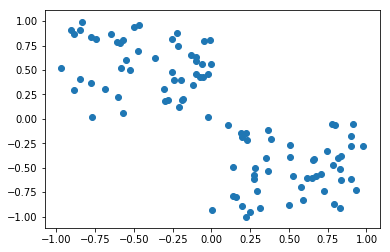

In [38]:
#Visualization of dataset
A = np.asarray(generateData(50))
x = []
y = []
for i in range(A.shape[0]):
    x.append(A[i,0])
    y.append(A[i,1])
plt.scatter(x,y)
plt.show()

In [39]:
class Perceptron:
    def __init__(self):
        self.w = rand(2)*2-1 #weights
        self.learning_rate = 0.1
    
    def response(self,x):
        y = x[0]*self.w[0]+x[1]*self.w[1]
        if y>=0:
            return 1
        else:
            return -1
    
    def updateWeights(self,x,iterError):
        self.w[0] += self.learning_rate*iterError*x[0]
        self.w[1] += self.learning_rate*iterError*x[1]
    
    def train(self,data):
        learned = False
        iteration = 0
        while not learned:
            globalError = 0.0
            for x in data:
                r = self.response(x)
                if x[2] != r:
                    iterError = x[2]-r
                    self.updateWeights(x,iterError)
                    globalError += abs(iterError)
            iteration += 1
            if globalError == 0.0 or iteration >=100:
                print "iterations", iteration
                learned = True

In [35]:
trainset = generateData(80) # train set generation
perceptron = Perceptron()   # perceptron instance
perceptron.train(trainset)  # training
testset = generateData(20)  # test set generation

iterations 2


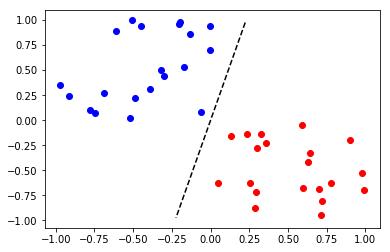

In [40]:
# Perceptron test
for x in testset:
    r = perceptron.response(x)
    if r != x[2]: # if the response is not correct
        print 'error'
    if r == 1:
        plot(x[0],x[1],'ob')  
    else:
        plot(x[0],x[1],'or')
#plotting seperation line
n = norm(perceptron.w)#Frobenius norm
ww = perceptron.w/n
ww1 = [ww[1],-ww[0]]
#print ww1
ww2 = [-ww[1],ww[0]]
#print ww2
plot([ww1[0], ww2[0]],[ww1[1], ww2[1]],'--k')
show()